Scraping content from: https://en.wikipedia.org/wiki/Earth

Scraped text length: 58353

Extracted SPO Triples:
Subject: Earth, Predicate: be, Object: planet
Subject: %, Predicate: be, Object: land
Subject: most, Predicate: locate, Object: land
Subject: sheets, Predicate: retain, Object: water
Subject: Earth, Predicate: have, Object: core
Subject: that, Predicate: generate, Object: capable
Subject: Earth, Predicate: have, Object: atmosphere
Subject: which, Predicate: sustain, Object: conditions
Subject: It, Predicate: have, Object: composition
Subject: that, Predicate: cover, Object: most
Subject: process, Predicate: maintain, Object: temperature
Subject: water, Predicate: be, Object: temperature
Subject: Differences, Predicate: drive, Object: atmospheric
Subject: It, Predicate: be, Object: planet
Subject: it, Predicate: be, Object: largest
Subject: Earth, Predicate: be, Object: minutes
Subject: which, Predicate: orbit, Object: Earth


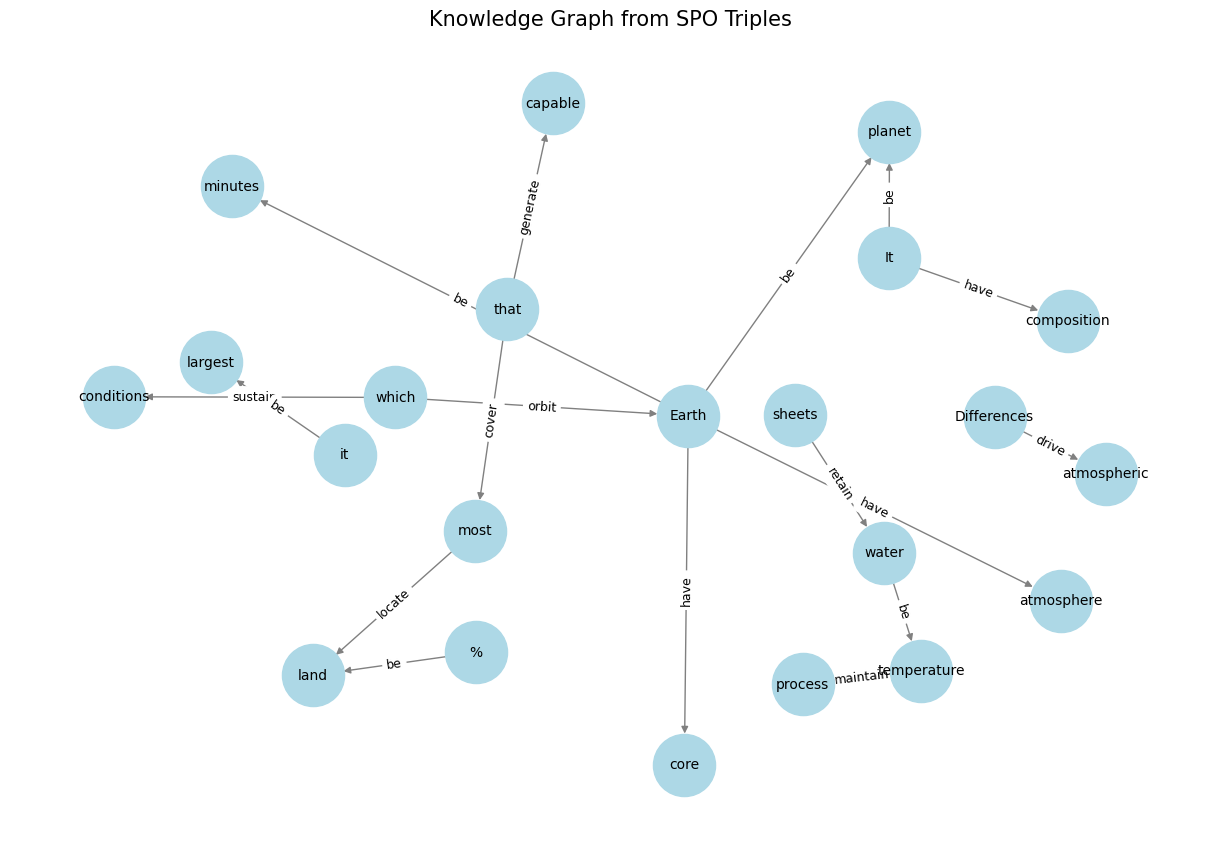

In [1]:
# --- Imports ---
import requests
from bs4 import BeautifulSoup
import spacy
import re
import networkx as nx
import matplotlib.pyplot as plt

# --- Load spaCy Model ---
nlp = spacy.load("en_core_web_sm")

# --- 1. Scrape text from a website ---
def scrape_text_from_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    paragraphs = soup.find_all('p')
    text = ' '.join([p.get_text() for p in paragraphs if len(p.get_text()) > 20])
    return text

# --- 2. Split compound sentences ---
def split_compound_sentences(text):
    # Split using punctuation and conjunctions
    sentences = re.split(r'(?<=[.?!])\s+|(?<!\b(?:Mr|Dr|Ms))\b(?:and|but|or|so|because|while|although)\b', text)
    return [s.strip() for s in sentences if s.strip()]

# --- 3. Extract SPO triples from one sentence ---
def extract_spo(sentence):
    doc = nlp(sentence)
    triples = []
    subject = ""
    predicate = ""
    obj = ""

    for token in doc:
        if "subj" in token.dep_:
            subject = token.text
            verb = token.head
            predicate = verb.lemma_
            for child in verb.children:
                if "obj" in child.dep_ or child.dep_ == "attr":
                    obj = child.text
                    break
            if subject and predicate and obj:
                triples.append((subject, predicate, obj))
    return triples

# --- 4. Extract SPO triples from full text ---
def extract_triples_from_text(text):
    sentences = split_compound_sentences(text)
    all_triples = []
    for sent in sentences:
        triples = extract_spo(sent)
        all_triples.extend(triples)
    return all_triples

# --- 5. Visualize SPO triples as a knowledge graph ---
def visualize_spo_triples(triples):
    G = nx.DiGraph()

    for subj, pred, obj in triples:
        G.add_node(subj)
        G.add_node(obj)
        G.add_edge(subj, obj, label=pred)

    pos = nx.spring_layout(G, k=0.5)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, edge_color='gray', arrows=True)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)
    plt.title("Knowledge Graph from SPO Triples", fontsize=15)
    plt.axis('off')
    plt.show()

# --- 6. Run Full Pipeline ---
if __name__ == "__main__":
    url = "https://en.wikipedia.org/wiki/Earth"  # Change this to any article URL
    print(f"Scraping content from: {url}\n")

    text = scrape_text_from_url(url)
    print("Scraped text length:", len(text))

    triples = extract_triples_from_text(text[:3000])  # Use a slice for speed
    print("\nExtracted SPO Triples:")
    for s, p, o in triples:
        print(f"Subject: {s}, Predicate: {p}, Object: {o}")

    visualize_spo_triples(triples)